# Classification

Classification is broadly the process of identifying what group or class a given data point should be a member of. Classification within ML is the process of learning the characteristics which distinguish one class from another.

## K-Means Clustering

K-means clustering is a method of taking a series of data points and a known number of classes ($k$) and determining the best way to partition the data to reduce the mean-squared error between points in the clusters.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
data = pd.read_csv('laptops.csv')

In [47]:
data = data[(data['brand'] == 'acer') | (data['brand'] == 'apple')]
data['Price'] = data['Price'].astype('float')
data['ram_memory'] = data['ram_memory'].astype('int')
data['usd'] = data['Price'] * 0.012
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,usd
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62,intel,core i5,12,16,8,...,0,intel,integrated,False,14.0,1920,1080,windows,1,479.88
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,70990.0,45,apple,m1,8,8,8,...,0,apple,apple,False,13.3,2560,1600,mac,1,851.88
22,23,apple,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max...,399900.0,65,apple,m3,16,16,8,...,0,apple,apple,False,16.2,3456,2234,mac,1,4798.80
25,26,acer,Acer Nitro V ANV15-51 2023 Gaming Laptop (13th...,77990.0,63,intel,core i5,8,12,16,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,1,935.88
34,36,apple,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ ...,102990.0,48,apple,m2,8,8,8,...,0,apple,apple,False,13.6,2560,1664,mac,1,1235.88


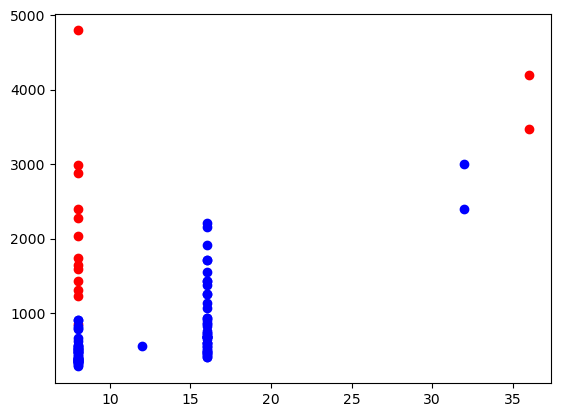

In [64]:
# Visualize how the data lines up for RAM vs Price
apple = data[data['brand'] == 'apple']
acer = data[data['brand'] == 'acer']

plt.scatter(apple['ram_memory'], apple['usd'], color='red')
plt.scatter(acer['ram_memory'], acer['usd'], color='blue')

In [69]:
train = data[['ram_memory', 'usd', 'brand']]
train_x = train[['ram_memory', 'usd']]

kmeans = KMeans(n_clusters=2, random_state=0).fit(train_x)

In [70]:
predictions = kmeans.predict(train_x.to_numpy())

/home/cbolles/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7b2103a6c5e0>
Traceback (most recent call last):
  File "/home/cbolles/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/cbolles/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/cbolles/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/cbolles/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
At

In [71]:
prediction_results = train
prediction_results['label'] = predictions

/tmp/ipykernel_5536/3634320958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_results['label'] = predictions


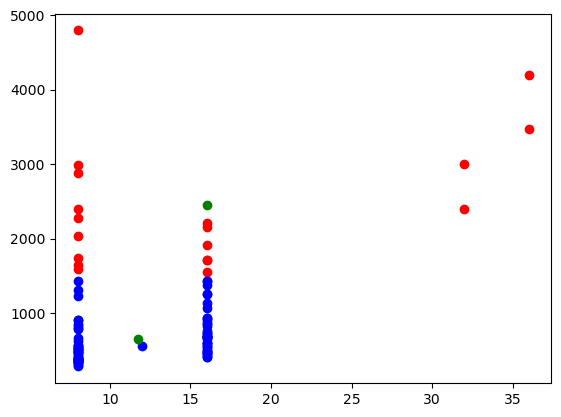

In [76]:
mean_1 = prediction_results[prediction_results['label'] == 0]
mean_2 = prediction_results[prediction_results['label'] == 1]

centers = kmeans.cluster_centers_
center_x = [center[0] for center in centers]
center_y = [center[1] for center in centers]

plt.scatter(mean_1['ram_memory'], mean_1['usd'], color='red')
plt.scatter(mean_2['ram_memory'], mean_2['usd'], color='blue')
plt.scatter(center_x, center_y, color='green')